In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error


### Generate data points in Python using:


In [11]:
x_data = np.linspace(-0.5 , 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

### a. Linear Regression Model

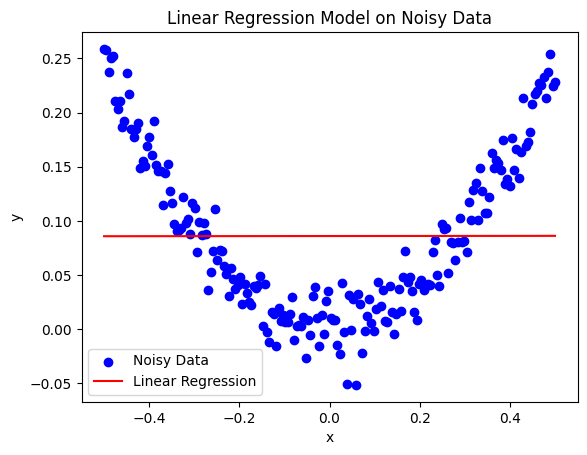

In [12]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x_data, y_data)

# Predict y values based on the x_data
y_pred = model.predict(x_data)

# Plot the original noisy data and the linear regression line
plt.scatter(x_data, y_data, color='blue', label='Noisy Data')
plt.plot(x_data, y_pred, color='red', label='Linear Regression')

# Adding labels and title
plt.title('Linear Regression Model on Noisy Data')
plt.xlabel('x')
plt.ylabel('y')

#Show the plot
plt.legend()
plt.grid=True
plt.show()

### b. Neural Network Model 


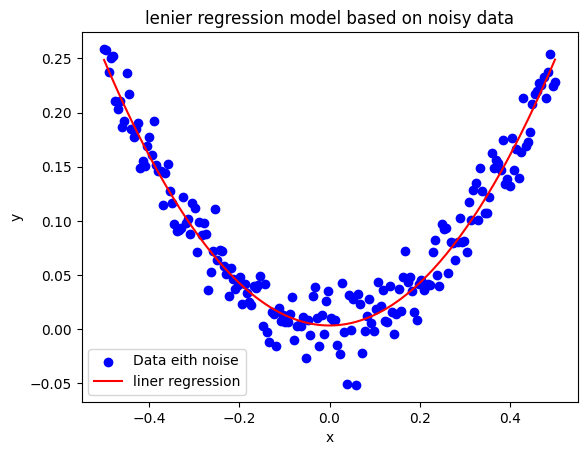

In [13]:

# Trsnform the data for a polynomial regression model for degree 2
ploy = PolynomialFeatures(degree=2)
x_ploy=ploy.fit_transform(x_data)

# Create and train the polynomial regression model
ploy_model = LinearRegression()
ploy_model.fit(x_ploy,y_data)

# Predict y values based on the polynomial model
y_poly_pred = ploy_model.predict(x_ploy)

# Plot the original noisy data and the liner regression line
plt.scatter(x_data , y_data,color='blue', label = 'Data eith noise')
plt.plot(x_data,y_poly_pred,color='red',label='liner regression')

# Adding labels and title
plt.title('lenier regression model based on noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid=True
plt.show()

### c. Compare Mean Squared Errors (MSE)


In [14]:
# Split the dataset into training (80%) and testing data (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

# Create the neural network model
nn_model = Sequential([
    Dense(6, input_dim=1, activation='relu'),  # Hidden layer with 6 nodes
    Dense(1)  # Output layer with 1 node
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on training data
nn_model.fit(x_train, y_train, epochs=200, verbose=0)

# Predict using the neural network on test data
y_nn_pred = nn_model.predict(x_test)

# Calculate the mean squared error for the neural network model
mse_nn = mean_squared_error(y_test, y_nn_pred)
print(f"Mean Squared Error (Neural Network): {mse_nn}")


/home/samir-akhalil/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (Neural Network): 0.0005202688893223246


### d. Compare Mean Squared Errors (MSE)
 

In [15]:


# Calculate Mean Squared Errors
mse_linear = mean_squared_error(y_test, model.predict(x_test))
mse_poly = mean_squared_error(y_test, ploy_model.predict(ploy.transform(x_test)))

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"Mean Squared Error (Polynomial Regression): {mse_poly}")
print(f"Mean Squared Error (Neural Network): {mse_nn}")




Mean Squared Error (Linear Regression): 0.005908675185979401
Mean Squared Error (Polynomial Regression): 0.00047513439232949023
Mean Squared Error (Neural Network): 0.0005202688893223246


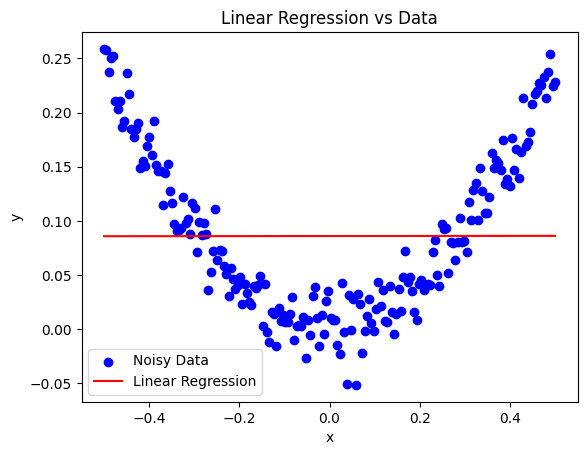

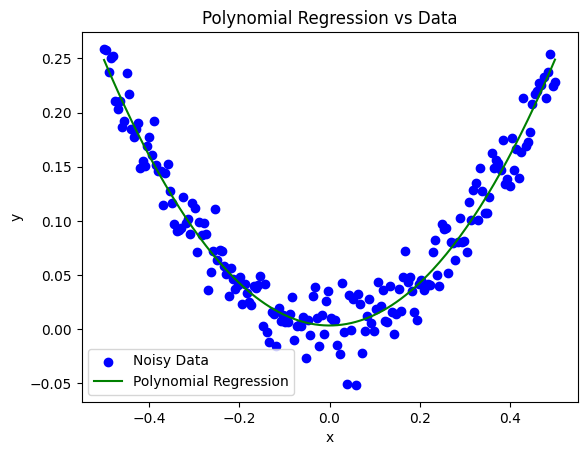

In [16]:
"""e. Plot the Predictions"""
# Plot linear regression predictions
plt.scatter(x_data, y_data, color='blue', label='Noisy Data')
plt.plot(x_data, model.predict(x_data), color='red', label='Linear Regression')
plt.title('Linear Regression vs Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot polynomial regression predictions
plt.scatter(x_data, y_data, color='blue', label='Noisy Data')
plt.plot(x_data, ploy_model.predict(ploy.transform(x_data)), color='green', label='Polynomial Regression')
plt.title('Polynomial Regression vs Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



